In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
bhilai_meteo = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Metrological Data/Bhilai.csv', skiprows = 2, delimiter=',')
bhilai_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,14.5,0.0,97,980.1,8.1,12.0,45,57
1,2024-01-01T01:00,14.7,0.0,99,981.3,6.2,8.2,36,67
2,2024-01-01T02:00,16.1,0.0,97,982.1,6.8,9.7,25,48
3,2024-01-01T03:00,18.5,0.0,84,983.2,4.1,8.7,38,45
4,2024-01-01T04:00,21.0,0.0,71,983.7,3.6,4.9,45,54
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,0.0,80,981.5,7.7,15.6,11,22
8780,2024-12-31T20:00,16.8,0.0,83,981.0,7.1,13.7,19,30
8781,2024-12-31T21:00,16.1,0.0,82,980.6,7.4,14.9,29,37
8782,2024-12-31T22:00,15.6,0.0,77,980.3,7.8,15.2,44,49


In [3]:
bhilai_pollutants = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Pollutants/Bhilai.csv', delimiter= ',')
bhilai_pollutants['Timestamp'] = bhilai_meteo['time']
bhilai_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
bhilai_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,89.88,208.48,10.20,37.39,30.56,20.54,10.15,1.47,9.69,...,NaN,16.12,84.63,0.18,189.34,0.0,0.0,28.96,NaN,NaN
1,2024-01-01T01:00,94.55,216.07,10.86,34.40,29.35,20.71,12.80,1.61,10.44,...,NaN,15.59,87.69,0.27,235.99,0.0,0.0,28.86,NaN,NaN
2,2024-01-01T02:00,95.42,210.99,10.05,27.87,25.03,21.06,14.91,1.52,11.83,...,NaN,14.92,90.38,0.23,82.14,0.0,0.0,28.94,NaN,NaN
3,2024-01-01T03:00,88.61,186.47,11.62,22.61,23.97,21.13,10.48,1.30,11.75,...,NaN,14.67,90.81,0.22,147.84,0.0,0.0,29.11,NaN,NaN
4,2024-01-01T04:00,83.17,172.65,10.01,21.76,22.07,21.17,13.66,0.98,13.34,...,NaN,14.94,90.50,0.36,40.91,0.0,0.0,29.12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,40.61,108.31,11.00,26.09,24.82,7.05,4.77,1.40,9.88,...,NaN,20.95,66.54,0.33,89.22,0.0,0.0,32.04,NaN,NaN
8780,2024-12-31T20:00,41.26,102.32,5.62,20.38,17.44,8.89,4.20,0.83,14.99,...,NaN,20.17,65.68,0.22,106.00,0.0,0.0,32.11,NaN,NaN
8781,2024-12-31T21:00,33.94,77.10,5.94,15.96,15.40,9.86,3.95,0.83,16.62,...,NaN,19.72,66.73,0.14,219.17,0.0,0.0,32.12,NaN,NaN
8782,2024-12-31T22:00,32.38,67.10,6.74,16.84,16.44,9.83,3.88,0.86,13.41,...,NaN,18.70,71.00,0.20,111.15,0.0,0.0,32.29,NaN,NaN


In [4]:
bhilai = pd.merge(bhilai_meteo.iloc[:, :], bhilai_pollutants.iloc[:, 0:3], on='time')
bhilai

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,14.5,0.0,97,980.1,8.1,12.0,45,57,89.88,208.48
1,2024-01-01T01:00,14.7,0.0,99,981.3,6.2,8.2,36,67,94.55,216.07
2,2024-01-01T02:00,16.1,0.0,97,982.1,6.8,9.7,25,48,95.42,210.99
3,2024-01-01T03:00,18.5,0.0,84,983.2,4.1,8.7,38,45,88.61,186.47
4,2024-01-01T04:00,21.0,0.0,71,983.7,3.6,4.9,45,54,83.17,172.65
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,0.0,80,981.5,7.7,15.6,11,22,40.61,108.31
8780,2024-12-31T20:00,16.8,0.0,83,981.0,7.1,13.7,19,30,41.26,102.32
8781,2024-12-31T21:00,16.1,0.0,82,980.6,7.4,14.9,29,37,33.94,77.10
8782,2024-12-31T22:00,15.6,0.0,77,980.3,7.8,15.2,44,49,32.38,67.10


In [5]:
bhilai['city'] = 'Bhilai'
bhilai

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,14.5,0.0,97,980.1,8.1,12.0,45,57,89.88,208.48,Bhilai
1,2024-01-01T01:00,14.7,0.0,99,981.3,6.2,8.2,36,67,94.55,216.07,Bhilai
2,2024-01-01T02:00,16.1,0.0,97,982.1,6.8,9.7,25,48,95.42,210.99,Bhilai
3,2024-01-01T03:00,18.5,0.0,84,983.2,4.1,8.7,38,45,88.61,186.47,Bhilai
4,2024-01-01T04:00,21.0,0.0,71,983.7,3.6,4.9,45,54,83.17,172.65,Bhilai
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,0.0,80,981.5,7.7,15.6,11,22,40.61,108.31,Bhilai
8780,2024-12-31T20:00,16.8,0.0,83,981.0,7.1,13.7,19,30,41.26,102.32,Bhilai
8781,2024-12-31T21:00,16.1,0.0,82,980.6,7.4,14.9,29,37,33.94,77.10,Bhilai
8782,2024-12-31T22:00,15.6,0.0,77,980.3,7.8,15.2,44,49,32.38,67.10,Bhilai


In [6]:
bhilai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8782 non-null   float64
 10  PM10 (µg/m³)              8769 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
bhilai = bhilai.interpolate()
bhilai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    bhilai[delay1_col] = bhilai[col].shift(1)
    delay2_col = col + "_delay2"
    bhilai[delay2_col] = bhilai[col].shift(2)
    bhilai.loc[0, delay1_col] = bhilai[col].iloc[-1]
    bhilai.loc[1, delay2_col] = bhilai[col].iloc[-1]
    bhilai.loc[0, delay2_col] = bhilai[col].iloc[-2]

bhilai

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,14.5,0.0,97,980.1,8.1,12.0,45,57,89.88,208.48,Bhilai,32.90,32.38,75.46,67.10
1,2024-01-01T01:00,14.7,0.0,99,981.3,6.2,8.2,36,67,94.55,216.07,Bhilai,89.88,32.90,208.48,75.46
2,2024-01-01T02:00,16.1,0.0,97,982.1,6.8,9.7,25,48,95.42,210.99,Bhilai,94.55,89.88,216.07,208.48
3,2024-01-01T03:00,18.5,0.0,84,983.2,4.1,8.7,38,45,88.61,186.47,Bhilai,95.42,94.55,210.99,216.07
4,2024-01-01T04:00,21.0,0.0,71,983.7,3.6,4.9,45,54,83.17,172.65,Bhilai,88.61,95.42,186.47,210.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,0.0,80,981.5,7.7,15.6,11,22,40.61,108.31,Bhilai,24.18,17.38,48.70,33.04
8780,2024-12-31T20:00,16.8,0.0,83,981.0,7.1,13.7,19,30,41.26,102.32,Bhilai,40.61,24.18,108.31,48.70
8781,2024-12-31T21:00,16.1,0.0,82,980.6,7.4,14.9,29,37,33.94,77.10,Bhilai,41.26,40.61,102.32,108.31
8782,2024-12-31T22:00,15.6,0.0,77,980.3,7.8,15.2,44,49,32.38,67.10,Bhilai,33.94,41.26,77.10,102.32


In [9]:
bilaspur_meteo = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Metrological Data/Bilaspur.csv', skiprows=2, delimiter=',')
bilaspur_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,14.2,0.0,93,985.1,8.3,16.8,18,28
1,2024-01-01T01:00,13.6,0.0,96,986.4,6.2,11.8,21,20
2,2024-01-01T02:00,14.6,0.0,90,986.9,7.2,10.6,27,24
3,2024-01-01T03:00,18.0,0.0,76,987.9,5.8,11.1,30,25
4,2024-01-01T04:00,21.6,0.0,62,988.6,5.0,7.1,30,30
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.6,0.0,69,986.5,10.8,22.0,15,15
8780,2024-12-31T20:00,13.7,0.0,75,985.9,11.3,22.7,10,11
8781,2024-12-31T21:00,12.8,0.0,80,985.5,10.2,21.5,8,8
8782,2024-12-31T22:00,12.0,0.0,84,985.0,10.4,21.5,8,6


In [10]:
bilaspur_pollutants = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Pollutants/Bilaspur.csv', delimiter= ',')
bilaspur_pollutants['Timestamp'] = bilaspur_meteo['time']
bilaspur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
bilaspur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,2.00,4.96,6.96,NaN,5.62,0.70,NaN,...,NaN,30.77,37.88,0.30,318.30,0.0,0.0,18.38,738.78,NaN
1,2024-01-01T01:00,NaN,NaN,2.02,4.97,7.00,NaN,2.87,0.69,NaN,...,NaN,30.76,37.96,0.68,320.43,0.0,0.0,17.66,739.35,NaN
2,2024-01-01T02:00,NaN,NaN,2.04,4.96,7.00,NaN,2.64,0.68,NaN,...,NaN,30.92,40.42,0.70,322.32,0.0,0.0,17.67,739.25,NaN
3,2024-01-01T03:00,NaN,57.34,2.02,4.99,7.00,NaN,0.91,0.67,NaN,...,NaN,30.86,39.47,0.83,321.46,0.0,0.0,17.50,739.35,NaN
4,2024-01-01T04:00,NaN,45.99,2.00,4.99,6.98,NaN,5.97,0.64,NaN,...,NaN,31.16,40.82,0.88,320.46,0.0,0.0,17.53,736.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [11]:
bilaspur = pd.merge(bilaspur_meteo.iloc[:, :], bilaspur_pollutants.iloc[:, 0:3], on='time')
bilaspur

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,14.2,0.0,93,985.1,8.3,16.8,18,28,NaN,NaN
1,2024-01-01T01:00,13.6,0.0,96,986.4,6.2,11.8,21,20,NaN,NaN
2,2024-01-01T02:00,14.6,0.0,90,986.9,7.2,10.6,27,24,NaN,NaN
3,2024-01-01T03:00,18.0,0.0,76,987.9,5.8,11.1,30,25,NaN,57.34
4,2024-01-01T04:00,21.6,0.0,62,988.6,5.0,7.1,30,30,NaN,45.99
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.6,0.0,69,986.5,10.8,22.0,15,15,NaN,NaN
8780,2024-12-31T20:00,13.7,0.0,75,985.9,11.3,22.7,10,11,NaN,NaN
8781,2024-12-31T21:00,12.8,0.0,80,985.5,10.2,21.5,8,8,NaN,NaN
8782,2024-12-31T22:00,12.0,0.0,84,985.0,10.4,21.5,8,6,NaN,NaN


In [12]:
bilaspur['city'] = 'Bilaspur'
bilaspur

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,14.2,0.0,93,985.1,8.3,16.8,18,28,NaN,NaN,Bilaspur
1,2024-01-01T01:00,13.6,0.0,96,986.4,6.2,11.8,21,20,NaN,NaN,Bilaspur
2,2024-01-01T02:00,14.6,0.0,90,986.9,7.2,10.6,27,24,NaN,NaN,Bilaspur
3,2024-01-01T03:00,18.0,0.0,76,987.9,5.8,11.1,30,25,NaN,57.34,Bilaspur
4,2024-01-01T04:00,21.6,0.0,62,988.6,5.0,7.1,30,30,NaN,45.99,Bilaspur
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.6,0.0,69,986.5,10.8,22.0,15,15,NaN,NaN,Bilaspur
8780,2024-12-31T20:00,13.7,0.0,75,985.9,11.3,22.7,10,11,NaN,NaN,Bilaspur
8781,2024-12-31T21:00,12.8,0.0,80,985.5,10.2,21.5,8,8,NaN,NaN,Bilaspur
8782,2024-12-31T22:00,12.0,0.0,84,985.0,10.4,21.5,8,6,NaN,NaN,Bilaspur


In [13]:
bilaspur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8160 non-null   float64
 10  PM10 (µg/m³)              8114 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
bilaspur = bilaspur.interpolate()
bilaspur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8771 non-null   float64
 10  PM10 (µg/m³)              8781 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for column in bilaspur.columns:
    bilaspur[column].fillna(bilaspur[column].mode()[0], inplace=True)

bilaspur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [16]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    bilaspur[delay1_col] = bilaspur[col].shift(1)
    delay2_col = col + "_delay2"
    bilaspur[delay2_col] = bilaspur[col].shift(2)
    bilaspur.loc[0, delay1_col] = bilaspur[col].iloc[-1]
    bilaspur.loc[1, delay2_col] = bilaspur[col].iloc[-1]
    bilaspur.loc[0, delay2_col] = bilaspur[col].iloc[-2]

bilaspur

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,14.2,0.0,93,985.1,8.3,16.8,18,28,17.38,23.27,Bilaspur,17.38,17.38,27.40,27.40
1,2024-01-01T01:00,13.6,0.0,96,986.4,6.2,11.8,21,20,17.38,23.27,Bilaspur,17.38,17.38,23.27,27.40
2,2024-01-01T02:00,14.6,0.0,90,986.9,7.2,10.6,27,24,17.38,23.27,Bilaspur,17.38,17.38,23.27,23.27
3,2024-01-01T03:00,18.0,0.0,76,987.9,5.8,11.1,30,25,17.38,57.34,Bilaspur,17.38,17.38,23.27,23.27
4,2024-01-01T04:00,21.6,0.0,62,988.6,5.0,7.1,30,30,17.38,45.99,Bilaspur,17.38,17.38,57.34,23.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.6,0.0,69,986.5,10.8,22.0,15,15,17.38,27.40,Bilaspur,17.38,17.38,27.40,27.40
8780,2024-12-31T20:00,13.7,0.0,75,985.9,11.3,22.7,10,11,17.38,27.40,Bilaspur,17.38,17.38,27.40,27.40
8781,2024-12-31T21:00,12.8,0.0,80,985.5,10.2,21.5,8,8,17.38,27.40,Bilaspur,17.38,17.38,27.40,27.40
8782,2024-12-31T22:00,12.0,0.0,84,985.0,10.4,21.5,8,6,17.38,27.40,Bilaspur,17.38,17.38,27.40,27.40


In [17]:
chhal_meteo = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Metrological Data/Chhal.csv', skiprows=2, delimiter=',')
chhal_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,13.8,0.0,90,987.6,5.9,13.4,14,24
1,2024-01-01T01:00,13.7,0.0,91,988.8,5.8,13.1,4,16
2,2024-01-01T02:00,15.2,0.0,85,989.4,7.2,11.6,3,22
3,2024-01-01T03:00,18.6,0.0,74,990.5,2.6,8.2,34,52
4,2024-01-01T04:00,21.5,0.0,64,991.0,1.8,3.3,37,49
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.6,0.0,73,988.5,10.8,25.0,360,353
8780,2024-12-31T20:00,13.8,0.0,77,988.0,9.4,23.2,1,353
8781,2024-12-31T21:00,13.0,0.0,80,987.5,7.9,20.5,4,352
8782,2024-12-31T22:00,12.3,0.0,83,987.1,7.7,19.7,357,351


In [18]:
chhal_pollutants = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Pollutants/Chhal.csv', delimiter= ',')
chhal_pollutants['Timestamp'] = chhal_meteo['time']
chhal_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
chhal_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,105.25,139.72,5.04,11.80,10.56,8.90,NaN,2.30,9.68,...,NaN,14.68,97.12,0.12,108.20,0.0,0.0,22.90,NaN,NaN
1,2024-01-01T01:00,101.03,128.16,6.17,12.20,11.67,8.90,NaN,2.66,7.53,...,NaN,14.02,97.43,0.13,107.08,0.0,0.0,23.05,NaN,NaN
2,2024-01-01T02:00,91.13,117.65,8.56,12.59,13.80,8.86,NaN,2.71,6.85,...,NaN,13.36,97.66,0.12,147.67,0.0,0.0,22.95,NaN,NaN
3,2024-01-01T03:00,75.64,102.60,5.24,9.83,9.69,8.84,NaN,2.22,8.76,...,NaN,12.45,97.41,0.37,184.36,0.0,0.0,23.40,NaN,NaN
4,2024-01-01T04:00,51.32,75.98,4.85,7.97,8.40,8.83,NaN,1.74,11.92,...,NaN,12.63,97.38,0.43,252.26,0.0,0.0,23.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,29.60,55.11,4.07,21.50,17.24,11.09,61.48,0.82,36.08,...,NaN,16.32,64.68,0.21,192.05,0.0,0.0,22.65,NaN,NaN
8780,2024-12-31T20:00,30.92,55.24,3.96,21.06,16.66,10.75,32.42,0.84,25.57,...,NaN,14.62,76.87,0.21,174.62,0.0,0.0,22.58,NaN,NaN
8781,2024-12-31T21:00,31.80,50.14,4.04,21.70,16.92,10.81,24.36,0.76,26.38,...,NaN,14.71,77.91,0.41,244.40,0.0,0.0,22.00,NaN,NaN
8782,2024-12-31T22:00,33.28,57.49,4.04,21.01,17.61,10.96,16.89,0.72,26.47,...,NaN,14.28,79.40,0.22,168.25,0.0,0.0,22.52,NaN,NaN


In [19]:
chhal = pd.merge(chhal_meteo.iloc[:, :], chhal_pollutants.iloc[:, 0:3], on='time')
chhal

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,13.8,0.0,90,987.6,5.9,13.4,14,24,105.25,139.72
1,2024-01-01T01:00,13.7,0.0,91,988.8,5.8,13.1,4,16,101.03,128.16
2,2024-01-01T02:00,15.2,0.0,85,989.4,7.2,11.6,3,22,91.13,117.65
3,2024-01-01T03:00,18.6,0.0,74,990.5,2.6,8.2,34,52,75.64,102.60
4,2024-01-01T04:00,21.5,0.0,64,991.0,1.8,3.3,37,49,51.32,75.98
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.6,0.0,73,988.5,10.8,25.0,360,353,29.60,55.11
8780,2024-12-31T20:00,13.8,0.0,77,988.0,9.4,23.2,1,353,30.92,55.24
8781,2024-12-31T21:00,13.0,0.0,80,987.5,7.9,20.5,4,352,31.80,50.14
8782,2024-12-31T22:00,12.3,0.0,83,987.1,7.7,19.7,357,351,33.28,57.49


In [20]:
chhal['city'] = 'Chhal'
chhal

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,13.8,0.0,90,987.6,5.9,13.4,14,24,105.25,139.72,Chhal
1,2024-01-01T01:00,13.7,0.0,91,988.8,5.8,13.1,4,16,101.03,128.16,Chhal
2,2024-01-01T02:00,15.2,0.0,85,989.4,7.2,11.6,3,22,91.13,117.65,Chhal
3,2024-01-01T03:00,18.6,0.0,74,990.5,2.6,8.2,34,52,75.64,102.60,Chhal
4,2024-01-01T04:00,21.5,0.0,64,991.0,1.8,3.3,37,49,51.32,75.98,Chhal
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.6,0.0,73,988.5,10.8,25.0,360,353,29.60,55.11,Chhal
8780,2024-12-31T20:00,13.8,0.0,77,988.0,9.4,23.2,1,353,30.92,55.24,Chhal
8781,2024-12-31T21:00,13.0,0.0,80,987.5,7.9,20.5,4,352,31.80,50.14,Chhal
8782,2024-12-31T22:00,12.3,0.0,83,987.1,7.7,19.7,357,351,33.28,57.49,Chhal


In [21]:
chhal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7991 non-null   float64
 10  PM10 (µg/m³)              8156 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
chhal = chhal.interpolate()
chhal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [23]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    chhal[delay1_col] = chhal[col].shift(1)
    delay2_col = col + "_delay2"
    chhal[delay2_col] = chhal[col].shift(2)
    chhal.loc[0, delay1_col] = chhal[col].iloc[-1]
    chhal.loc[1, delay2_col] = chhal[col].iloc[-1]
    chhal.loc[0, delay2_col] = chhal[col].iloc[-2]

chhal

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,13.8,0.0,90,987.6,5.9,13.4,14,24,105.25,139.72,Chhal,30.16,33.28,50.25,57.49
1,2024-01-01T01:00,13.7,0.0,91,988.8,5.8,13.1,4,16,101.03,128.16,Chhal,105.25,30.16,139.72,50.25
2,2024-01-01T02:00,15.2,0.0,85,989.4,7.2,11.6,3,22,91.13,117.65,Chhal,101.03,105.25,128.16,139.72
3,2024-01-01T03:00,18.6,0.0,74,990.5,2.6,8.2,34,52,75.64,102.60,Chhal,91.13,101.03,117.65,128.16
4,2024-01-01T04:00,21.5,0.0,64,991.0,1.8,3.3,37,49,51.32,75.98,Chhal,75.64,91.13,102.60,117.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.6,0.0,73,988.5,10.8,25.0,360,353,29.60,55.11,Chhal,28.86,22.22,53.24,46.19
8780,2024-12-31T20:00,13.8,0.0,77,988.0,9.4,23.2,1,353,30.92,55.24,Chhal,29.60,28.86,55.11,53.24
8781,2024-12-31T21:00,13.0,0.0,80,987.5,7.9,20.5,4,352,31.80,50.14,Chhal,30.92,29.60,55.24,55.11
8782,2024-12-31T22:00,12.3,0.0,83,987.1,7.7,19.7,357,351,33.28,57.49,Chhal,31.80,30.92,50.14,55.24


In [24]:
korba_meteo = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Metrological Data/Korba.csv', skiprows=2, delimiter = ',')
korba_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,12.4,0.0,93,982.1,7.6,10.9,355,343
1,2024-01-01T01:00,12.4,0.0,95,983.5,5.5,14.2,337,344
2,2024-01-01T02:00,14.0,0.0,90,984.0,7.7,13.2,332,343
3,2024-01-01T03:00,17.2,0.0,79,985.1,4.1,10.5,315,344
4,2024-01-01T04:00,20.7,0.0,66,985.7,3.6,5.3,315,332
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.5,0.0,76,983.4,6.0,17.1,327,349
8780,2024-12-31T20:00,12.8,0.0,81,982.9,6.1,16.7,326,344
8781,2024-12-31T21:00,12.0,0.0,87,982.4,5.8,16.3,326,343
8782,2024-12-31T22:00,11.3,0.0,90,982.0,5.6,14.7,320,340


In [25]:
korba_pollutants = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Pollutants/Korba.csv', delimiter= ',')
korba_pollutants['Timestamp'] = korba_meteo['time']
korba_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
korba_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,22.42,51.57,14.68,48.78,45.89,21.23,5.12,0.76,25.04,...,NaN,17.24,78.34,1.01,43.15,0.0,0.0,23.98,NaN,NaN
1,2024-01-01T01:00,22.70,53.58,13.02,47.73,44.61,19.83,5.40,0.76,24.58,...,NaN,16.77,80.23,0.81,37.83,0.0,0.0,24.02,NaN,NaN
2,2024-01-01T02:00,26.48,63.32,11.99,47.44,44.08,19.34,5.13,0.74,24.74,...,NaN,16.33,80.96,0.90,44.92,0.0,0.0,24.04,NaN,NaN
3,2024-01-01T03:00,25.60,56.09,11.71,47.30,43.88,19.78,5.70,0.70,24.80,...,NaN,15.86,82.03,1.09,56.92,0.0,0.0,24.00,NaN,NaN
4,2024-01-01T04:00,21.17,46.18,11.60,45.52,42.28,19.44,6.54,0.64,24.75,...,NaN,15.09,83.49,1.09,52.60,0.0,0.0,23.95,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [26]:
korba = pd.merge(korba_meteo.iloc[:, :], korba_pollutants.iloc[:, 0:3], on='time')
korba

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,12.4,0.0,93,982.1,7.6,10.9,355,343,22.42,51.57
1,2024-01-01T01:00,12.4,0.0,95,983.5,5.5,14.2,337,344,22.70,53.58
2,2024-01-01T02:00,14.0,0.0,90,984.0,7.7,13.2,332,343,26.48,63.32
3,2024-01-01T03:00,17.2,0.0,79,985.1,4.1,10.5,315,344,25.60,56.09
4,2024-01-01T04:00,20.7,0.0,66,985.7,3.6,5.3,315,332,21.17,46.18
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.5,0.0,76,983.4,6.0,17.1,327,349,NaN,NaN
8780,2024-12-31T20:00,12.8,0.0,81,982.9,6.1,16.7,326,344,NaN,NaN
8781,2024-12-31T21:00,12.0,0.0,87,982.4,5.8,16.3,326,343,NaN,NaN
8782,2024-12-31T22:00,11.3,0.0,90,982.0,5.6,14.7,320,340,NaN,NaN


In [27]:
korba['city'] = 'Korba'

In [28]:
korba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8316 non-null   float64
 10  PM10 (µg/m³)              8388 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [29]:
korba = korba.interpolate()
korba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [30]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    korba[delay1_col] = korba[col].shift(1)
    delay2_col = col + "_delay2"
    korba[delay2_col] = korba[col].shift(2)
    korba.loc[0, delay1_col] = korba[col].iloc[-1]
    korba.loc[1, delay2_col] = korba[col].iloc[-1]
    korba.loc[0, delay2_col] = korba[col].iloc[-2]

korba

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,12.4,0.0,93,982.1,7.6,10.9,355,343,22.42,51.57,Korba,26.91,26.91,80.86,80.86
1,2024-01-01T01:00,12.4,0.0,95,983.5,5.5,14.2,337,344,22.70,53.58,Korba,22.42,26.91,51.57,80.86
2,2024-01-01T02:00,14.0,0.0,90,984.0,7.7,13.2,332,343,26.48,63.32,Korba,22.70,22.42,53.58,51.57
3,2024-01-01T03:00,17.2,0.0,79,985.1,4.1,10.5,315,344,25.60,56.09,Korba,26.48,22.70,63.32,53.58
4,2024-01-01T04:00,20.7,0.0,66,985.7,3.6,5.3,315,332,21.17,46.18,Korba,25.60,26.48,56.09,63.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.5,0.0,76,983.4,6.0,17.1,327,349,26.91,80.86,Korba,26.91,26.91,80.86,80.86
8780,2024-12-31T20:00,12.8,0.0,81,982.9,6.1,16.7,326,344,26.91,80.86,Korba,26.91,26.91,80.86,80.86
8781,2024-12-31T21:00,12.0,0.0,87,982.4,5.8,16.3,326,343,26.91,80.86,Korba,26.91,26.91,80.86,80.86
8782,2024-12-31T22:00,11.3,0.0,90,982.0,5.6,14.7,320,340,26.91,80.86,Korba,26.91,26.91,80.86,80.86


In [31]:
milupara_meteo = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Metrological Data/Milupara.csv', skiprows=2, delimiter = ',')
milupara_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,14.2,0.0,84,983.6,6.0,9.2,57,69
1,2024-01-01T01:00,13.1,0.0,92,984.7,4.6,3.1,51,36
2,2024-01-01T02:00,15.2,0.0,82,985.5,6.8,4.6,58,45
3,2024-01-01T03:00,18.9,0.0,71,986.6,2.9,4.3,60,66
4,2024-01-01T04:00,22.2,0.0,59,987.1,1.8,2.6,360,16
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.3,0.0,78,984.2,7.1,14.6,27,13
8780,2024-12-31T20:00,12.6,0.0,82,983.7,6.2,12.0,33,18
8781,2024-12-31T21:00,11.9,0.0,85,983.2,5.7,8.7,37,21
8782,2024-12-31T22:00,11.3,0.0,87,982.8,5.8,7.8,39,23


In [32]:
milupara_pollutants = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Pollutants/Milupara.csv', delimiter= ',')
milupara_pollutants['Timestamp'] = milupara_meteo['time']
milupara_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
milupara_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,62.37,93.10,2.36,12.23,9.16,6.91,8.18,0.75,18.41,...,NaN,14.34,96.61,0.71,215.85,0.0,0.0,6.28,NaN,NaN
1,2024-01-01T01:00,57.03,78.04,2.30,11.85,8.91,6.92,7.80,0.75,17.33,...,NaN,13.85,96.10,0.49,224.13,0.0,0.0,6.05,NaN,NaN
2,2024-01-01T02:00,53.67,75.96,2.34,10.35,8.15,6.99,7.41,0.68,13.79,...,NaN,13.06,96.42,0.71,218.44,0.0,0.0,6.12,NaN,NaN
3,2024-01-01T03:00,49.20,63.47,2.34,8.98,7.43,7.11,7.34,0.56,16.70,...,NaN,12.65,96.02,0.81,217.00,0.0,0.0,6.05,NaN,NaN
4,2024-01-01T04:00,48.00,60.00,2.33,8.84,7.35,7.04,7.33,0.53,17.29,...,NaN,12.51,95.52,0.80,216.34,0.0,0.0,6.08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,27.56,78.86,NaN,NaN,NaN,NaN,0.93,0.46,1.91,...,NaN,15.02,82.02,0.80,221.86,0.0,0.0,6.22,NaN,NaN
8780,2024-12-31T20:00,29.22,73.88,NaN,NaN,NaN,NaN,0.50,0.34,3.35,...,NaN,13.95,85.62,0.95,217.74,0.0,0.0,6.00,NaN,NaN
8781,2024-12-31T21:00,21.05,51.20,NaN,NaN,NaN,NaN,0.34,0.38,2.06,...,NaN,13.37,85.92,0.57,222.05,0.0,0.0,5.80,NaN,NaN
8782,2024-12-31T22:00,16.43,46.59,NaN,NaN,NaN,NaN,0.08,0.34,NaN,...,NaN,12.48,88.22,0.82,214.10,0.0,0.0,5.95,NaN,NaN


In [33]:
milupara = pd.merge(milupara_meteo.iloc[:, :], milupara_pollutants.iloc[:, 0:3], on='time')
milupara

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,14.2,0.0,84,983.6,6.0,9.2,57,69,62.37,93.10
1,2024-01-01T01:00,13.1,0.0,92,984.7,4.6,3.1,51,36,57.03,78.04
2,2024-01-01T02:00,15.2,0.0,82,985.5,6.8,4.6,58,45,53.67,75.96
3,2024-01-01T03:00,18.9,0.0,71,986.6,2.9,4.3,60,66,49.20,63.47
4,2024-01-01T04:00,22.2,0.0,59,987.1,1.8,2.6,360,16,48.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.3,0.0,78,984.2,7.1,14.6,27,13,27.56,78.86
8780,2024-12-31T20:00,12.6,0.0,82,983.7,6.2,12.0,33,18,29.22,73.88
8781,2024-12-31T21:00,11.9,0.0,85,983.2,5.7,8.7,37,21,21.05,51.20
8782,2024-12-31T22:00,11.3,0.0,87,982.8,5.8,7.8,39,23,16.43,46.59


In [34]:
milupara['city'] = 'Milupara'
milupara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             5055 non-null   float64
 10  PM10 (µg/m³)              5072 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [35]:
milupara = milupara.interpolate()
milupara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [36]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    milupara[delay1_col] = milupara[col].shift(1)
    delay2_col = col + "_delay2"
    milupara[delay2_col] = milupara[col].shift(2)
    milupara.loc[0, delay1_col] = milupara[col].iloc[-1]
    milupara.loc[1, delay2_col] = milupara[col].iloc[-1]
    milupara.loc[0, delay2_col] = milupara[col].iloc[-2]

milupara

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,14.2,0.0,84,983.6,6.0,9.2,57,69,62.37,93.10,Milupara,21.01,16.43,56.68,46.59
1,2024-01-01T01:00,13.1,0.0,92,984.7,4.6,3.1,51,36,57.03,78.04,Milupara,62.37,21.01,93.10,56.68
2,2024-01-01T02:00,15.2,0.0,82,985.5,6.8,4.6,58,45,53.67,75.96,Milupara,57.03,62.37,78.04,93.10
3,2024-01-01T03:00,18.9,0.0,71,986.6,2.9,4.3,60,66,49.20,63.47,Milupara,53.67,57.03,75.96,78.04
4,2024-01-01T04:00,22.2,0.0,59,987.1,1.8,2.6,360,16,48.00,60.00,Milupara,49.20,53.67,63.47,75.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.3,0.0,78,984.2,7.1,14.6,27,13,27.56,78.86,Milupara,24.63,22.86,74.62,68.06
8780,2024-12-31T20:00,12.6,0.0,82,983.7,6.2,12.0,33,18,29.22,73.88,Milupara,27.56,24.63,78.86,74.62
8781,2024-12-31T21:00,11.9,0.0,85,983.2,5.7,8.7,37,21,21.05,51.20,Milupara,29.22,27.56,73.88,78.86
8782,2024-12-31T22:00,11.3,0.0,87,982.8,5.8,7.8,39,23,16.43,46.59,Milupara,21.05,29.22,51.20,73.88


In [37]:
raipur_meteo = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Metrological Data/Raipur.csv', skiprows=2, delimiter=',')
raipur_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,14.3,0.0,95,981.3,7.1,12.2,49,56
1,2024-01-01T01:00,14.2,0.0,98,982.6,5.5,7.8,32,56
2,2024-01-01T02:00,15.5,0.0,95,983.2,6.1,9.7,28,42
3,2024-01-01T03:00,18.1,0.0,81,984.3,3.7,8.5,29,36
4,2024-01-01T04:00,20.8,0.0,70,985.0,2.3,3.3,39,41
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,0.0,60,982.9,5.7,12.5,32,43
8780,2024-12-31T20:00,16.9,0.0,63,982.4,6.5,13.4,28,39
8781,2024-12-31T21:00,16.1,0.0,63,981.9,7.5,15.0,24,37
8782,2024-12-31T22:00,15.4,0.0,65,981.6,6.8,14.0,27,38


In [38]:
raipur_pollutants = pd.read_csv('/kaggle/input/chattisgarh-aqi/Chhattisgarh/Pollutants/Raipur.csv', delimiter= ',')
raipur_pollutants['Timestamp'] = raipur_meteo['time']
raipur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
raipur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,84.27,153.61,32.53,60.70,59.83,9.87,3.78,1.53,2.32,...,NaN,16.76,86.58,0.14,200.34,0.0,0.0,27.41,NaN,NaN
1,2024-01-01T01:00,88.74,146.81,32.71,59.85,59.53,9.98,3.96,1.45,2.32,...,NaN,16.37,88.22,0.13,180.07,0.0,0.0,27.93,NaN,NaN
2,2024-01-01T02:00,89.05,172.42,33.18,58.76,59.30,9.90,3.99,1.40,2.37,...,NaN,15.93,89.99,0.14,166.81,0.0,0.0,27.33,NaN,NaN
3,2024-01-01T03:00,93.56,165.60,34.04,68.41,65.28,12.16,2.70,1.35,2.17,...,NaN,15.45,89.64,0.16,79.54,0.0,0.0,40.78,NaN,NaN
4,2024-01-01T04:00,89.76,162.90,27.72,66.18,59.01,11.84,2.74,1.24,2.07,...,NaN,15.18,90.12,0.12,79.69,0.0,0.0,41.18,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,39.94,87.76,37.98,35.90,48.97,10.10,7.58,1.20,2.64,...,NaN,17.20,64.99,1.00,89.52,0.0,0.0,54.80,NaN,NaN
8780,2024-12-31T20:00,41.04,101.32,44.46,34.28,53.31,10.34,7.54,1.40,2.64,...,NaN,16.32,64.23,0.89,107.54,0.0,0.0,56.55,NaN,NaN
8781,2024-12-31T21:00,40.94,154.12,49.24,33.58,56.77,10.76,8.05,1.54,2.64,...,NaN,15.60,69.70,1.14,144.36,0.0,0.0,56.27,NaN,NaN
8782,2024-12-31T22:00,41.80,144.61,50.94,33.51,58.11,10.84,7.42,1.48,2.64,...,NaN,15.10,55.55,0.80,187.44,0.0,0.0,56.03,NaN,NaN


In [39]:
raipur = pd.merge(raipur_meteo.iloc[:, :], raipur_pollutants.iloc[:, 0:3], on='time')
raipur

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,14.3,0.0,95,981.3,7.1,12.2,49,56,84.27,153.61
1,2024-01-01T01:00,14.2,0.0,98,982.6,5.5,7.8,32,56,88.74,146.81
2,2024-01-01T02:00,15.5,0.0,95,983.2,6.1,9.7,28,42,89.05,172.42
3,2024-01-01T03:00,18.1,0.0,81,984.3,3.7,8.5,29,36,93.56,165.60
4,2024-01-01T04:00,20.8,0.0,70,985.0,2.3,3.3,39,41,89.76,162.90
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,0.0,60,982.9,5.7,12.5,32,43,39.94,87.76
8780,2024-12-31T20:00,16.9,0.0,63,982.4,6.5,13.4,28,39,41.04,101.32
8781,2024-12-31T21:00,16.1,0.0,63,981.9,7.5,15.0,24,37,40.94,154.12
8782,2024-12-31T22:00,15.4,0.0,65,981.6,6.8,14.0,27,38,41.80,144.61


In [40]:
raipur['city'] = 'Raipur'

In [41]:
raipur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8766 non-null   float64
 10  PM10 (µg/m³)              8766 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [42]:
raipur = raipur.interpolate()
raipur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [43]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    raipur[delay1_col] = raipur[col].shift(1)
    delay2_col = col + "_delay2"
    raipur[delay2_col] = raipur[col].shift(2)
    raipur.loc[0, delay1_col] = raipur[col].iloc[-1]
    raipur.loc[1, delay2_col] = raipur[col].iloc[-1]
    raipur.loc[0, delay2_col] = raipur[col].iloc[-2]

raipur

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,14.3,0.0,95,981.3,7.1,12.2,49,56,84.27,153.61,Raipur,38.48,41.80,115.86,144.61
1,2024-01-01T01:00,14.2,0.0,98,982.6,5.5,7.8,32,56,88.74,146.81,Raipur,84.27,38.48,153.61,115.86
2,2024-01-01T02:00,15.5,0.0,95,983.2,6.1,9.7,28,42,89.05,172.42,Raipur,88.74,84.27,146.81,153.61
3,2024-01-01T03:00,18.1,0.0,81,984.3,3.7,8.5,29,36,93.56,165.60,Raipur,89.05,88.74,172.42,146.81
4,2024-01-01T04:00,20.8,0.0,70,985.0,2.3,3.3,39,41,89.76,162.90,Raipur,93.56,89.05,165.60,172.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,17.7,0.0,60,982.9,5.7,12.5,32,43,39.94,87.76,Raipur,27.63,21.75,81.77,73.47
8780,2024-12-31T20:00,16.9,0.0,63,982.4,6.5,13.4,28,39,41.04,101.32,Raipur,39.94,27.63,87.76,81.77
8781,2024-12-31T21:00,16.1,0.0,63,981.9,7.5,15.0,24,37,40.94,154.12,Raipur,41.04,39.94,101.32,87.76
8782,2024-12-31T22:00,15.4,0.0,65,981.6,6.8,14.0,27,38,41.80,144.61,Raipur,40.94,41.04,154.12,101.32


In [44]:
chattisgarh_data = pd.concat([bhilai, bilaspur, chhal, korba, milupara, raipur], axis=0, ignore_index=True)
chattisgarh_data

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,14.5,0.0,97,980.1,8.1,12.0,45,57,89.88,208.48,Bhilai,32.90,32.38,75.46,67.10
1,2024-01-01T01:00,14.7,0.0,99,981.3,6.2,8.2,36,67,94.55,216.07,Bhilai,89.88,32.90,208.48,75.46
2,2024-01-01T02:00,16.1,0.0,97,982.1,6.8,9.7,25,48,95.42,210.99,Bhilai,94.55,89.88,216.07,208.48
3,2024-01-01T03:00,18.5,0.0,84,983.2,4.1,8.7,38,45,88.61,186.47,Bhilai,95.42,94.55,210.99,216.07
4,2024-01-01T04:00,21.0,0.0,71,983.7,3.6,4.9,45,54,83.17,172.65,Bhilai,88.61,95.42,186.47,210.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,2024-12-31T19:00,17.7,0.0,60,982.9,5.7,12.5,32,43,39.94,87.76,Raipur,27.63,21.75,81.77,73.47
52700,2024-12-31T20:00,16.9,0.0,63,982.4,6.5,13.4,28,39,41.04,101.32,Raipur,39.94,27.63,87.76,81.77
52701,2024-12-31T21:00,16.1,0.0,63,981.9,7.5,15.0,24,37,40.94,154.12,Raipur,41.04,39.94,101.32,87.76
52702,2024-12-31T22:00,15.4,0.0,65,981.6,6.8,14.0,27,38,41.80,144.61,Raipur,40.94,41.04,154.12,101.32


In [45]:
chattisgarh_data['city'] = chattisgarh_data['city'].astype('category')

In [46]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [47]:
X, y = chattisgarh_data[input_cols], chattisgarh_data[target_cols]

In [48]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [49]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [50]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
pred_check = model.predict(X)

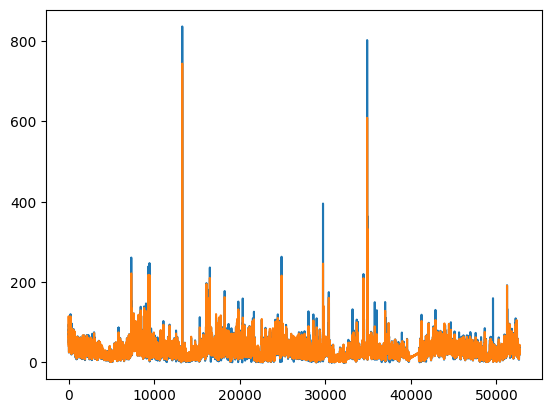

In [52]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [53]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9322019586340098


In [54]:
import joblib
joblib.dump(model, 'Chattisgarh_PM2.5_µgm³.pkl')

['Chattisgarh_PM2.5_µgm³.pkl']

In [55]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
pred_check2 = model.predict(X)

In [57]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.8675579890130078


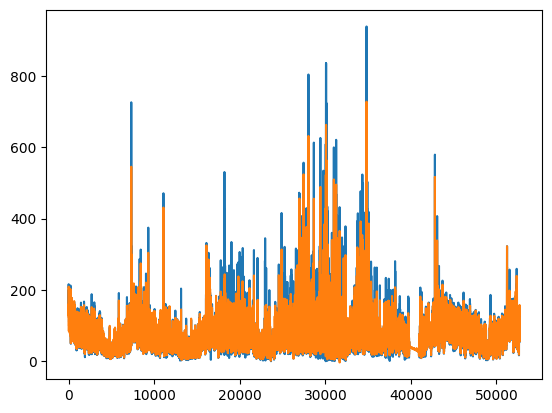

In [58]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [59]:
joblib.dump(model, 'AndhraPradesh_PM10_µgm³.pkl')

['AndhraPradesh_PM10_µgm³.pkl']